In [82]:
import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

In [83]:
# Dependencies
import openweathermapy.core as owm
import json
from citipy import citipy
import pandas as pd
import requests
import random as random
import matplotlib.pyplot as plt

api_key = '4a313f88ffabce0a2caeea2d23fe9ace'

In [84]:
# set limit variables
max_long = 90
min_long = -90
max_lat = 180
min_lat = -180
step = 1

settings = {"units": "imperial", "appid": api_key}

In [85]:
#Generate random longitude and latitude
rand_long = random.randrange(min_long, max_long, step)
rand_lat = random.randrange(min_lat, max_lat, step)

rand_lat

176

In [86]:
city = citipy.nearest_city(rand_long, rand_lat)
city.city_name


'dunedin'

In [87]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
print('hello')

hello


In [88]:
# create counter
counter = 0
cities = []
weather = []


#create list of 500 unique cities that are searchable on weather API
while counter < 500:
    rand_long = random.randrange(min_long, max_long, step)
    rand_lat = random.randrange(min_lat, max_lat, step)
    city = citipy.nearest_city(rand_long, rand_lat)
    #if city not in list, add it 
    if (city.city_name in cities):
        counter = counter + 0
    else:
        #try except 
            try:
                current_weather = owm.get_current(str(city.city_name), **settings)
                cities.append(str(city.city_name))
                counter = counter + 1
                #print(counter)
            except:
                counter = counter + 0
                #print('not found')
        
    

In [89]:
cities

['busselton',
 'port elizabeth',
 'hobart',
 'cockburn town',
 'hobyo',
 'ushuaia',
 'manokwari',
 'avarua',
 'olinda',
 'perelyub',
 'hohhot',
 'kuala terengganu',
 'bethel',
 'simoes',
 'tasiilaq',
 'imbituba',
 'mattru',
 'mae hong son',
 'sao jose da coroa grande',
 'upernavik',
 'rikitea',
 'godinesti',
 'hilo',
 'thompson',
 'saint simons',
 'jamestown',
 'punta arenas',
 'mana',
 'klaksvik',
 'nikolskoye',
 'puerto ayora',
 'sorland',
 'albany',
 'luderitz',
 'maceio',
 'tiksi',
 'hermanus',
 'sistranda',
 'tuktoyaktuk',
 'hami',
 'palembang',
 'saint-philippe',
 'sanchor',
 'moroni',
 'eura',
 'langsa',
 'cape town',
 'kalanwali',
 'tikrit',
 'torbay',
 'carnarvon',
 'palmer',
 'hithadhoo',
 'viedma',
 'cerrik',
 'caravelas',
 'quatre cocos',
 'west bay',
 'qaanaaq',
 'margate',
 'aleksandrovka',
 'mar del plata',
 'sitka',
 'sasaram',
 'ilulissat',
 'mount isa',
 'boa vista',
 'meulaboh',
 'severo-kurilsk',
 'geraldton',
 'eureka',
 'erenhot',
 'barrow',
 'longyearbyen',
 'pis

In [90]:
# Get current weather
summary = ["name", "main.temp", "main.humidity","clouds.all", "wind.speed", "coord.lon", "coord.lat"]

name = []
lon = []
lat = []
temp = []
humid = []
clouds = []
wind = []

for x in cities:
    current_weather = owm.get_current(x, **settings)
    data = current_weather(*summary)
    name.append(data[0])
    temp.append(data[1])
    humid.append(data[2])
    clouds.append(data[3])
    wind.append(data[4])
    lon.append(data[5])
    lat.append(data[6])
    
    #print(f"Current weather object for {x}: {current_weather}.")



In [91]:
#build temp and lat dataframe for analysis
temperature = []
latitude = []

master = {
    'Name' : name,
    'Longitude' : lon,
    'Latitude' : lat,
    'Temperature' : temp,
    'Humidity' : humid,
    'Clouds' : clouds,
    'Wind' : wind}

yo = pd.DataFrame(master)
yo = yo.set_index("Name")
yo.head()


,Clouds,Humidity,Latitude,Longitude,Temperature,Wind
Name,,,,,,
Busselton,0,87,-33.64,115.35,74.04,13.22
Port Elizabeth,20,38,39.31,-74.98,44.62,11.41
Hobart,20,81,-42.88,147.33,50.00,9.17
Cockburn Town,0,100,21.46,-71.14,74.18,11.10
Hobyo,36,85,5.35,48.53,78.23,14.67


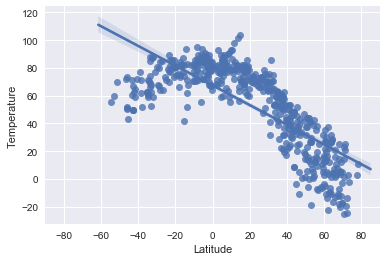

In [92]:
#Temperature (F) vs. Latitude
# note: if regression line is negative sloped, then winter is likely in the south hemisphere
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="Latitude", y="Temperature", data=yo,fit_reg=True)
ax.set(xlim=(-90, 90))
plt.show()

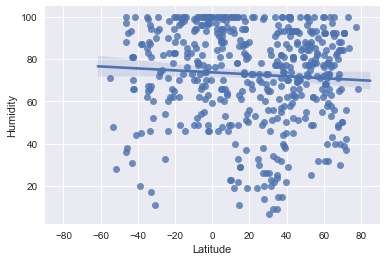

In [93]:
bx = sns.regplot(x="Latitude", y="Humidity", data=yo,fit_reg=True)
bx.set(xlim=(-90, 90))
plt.show()

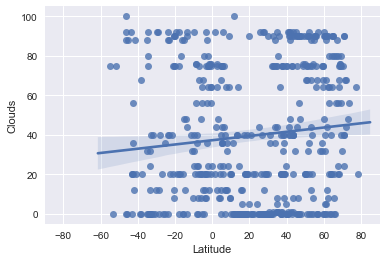

In [94]:
cx = sns.regplot(x="Latitude", y="Clouds", data=yo,fit_reg=True)
cx.set(xlim=(-90, 90))
plt.show()

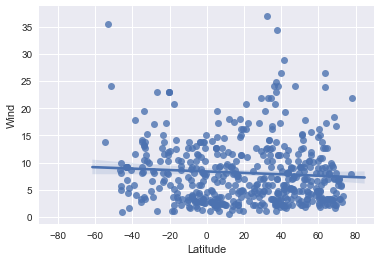

In [95]:
dx = sns.regplot(x="Latitude", y="Wind", data=yo,fit_reg=True)
dx.set(xlim=(-90, 90))
plt.show()